<a href="https://colab.research.google.com/github/farsashraf/OOP/blob/main/recommendation%20system%20with%20k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1050]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

In [1051]:
data = pd.read_csv('/content/yaret.csv')
data.head()

,age,sex,city,pref_Hobby,pref_donation,another_type_donation,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [1052]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
data.columns = cols_name
data.head()

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,15,f,Kafr El-Sheikh,read,education,things,online,1,3000
1,54,m,Giza,sports,health,time,himself,3,5000
2,31,f,the new Valley,music,Poverty,skills,mobile,2,4000
3,17,f,Western,rarts,environment,knowledge,email,5,3500
4,34,f,Menoufia,music,health,things,mobile,4,6000


In [1053]:
data.drop(['pref_hobby'] ,axis = 1 , inplace = True)

In [1054]:
df = data.copy()

In [1055]:
encoded_data_sex={
    'm' : 0,
    'f' : 1
}

encoded_data_city = {
'Alexandria' : 1,
'Aswan' : 2,
'Asyut' : 3,
'Bani Sweif' : 4,
'Cairo' : 5,
'Damietta' : 6,
'Eastern' : 7 ,
'Fayoum' : 8 ,
'Giza' : 9 ,
'Ismailia' : 10,
'Kafr El-Sheikh' : 11 ,
'Mansoura' : 12 ,
'Marsa Matrouh' : 13,
'Menoufia' : 14 ,
'Minya' : 15,
'North Sinai' : 16 ,
'Port Said' : 17,
'Qalyubia' : 18,
'Sohag': 19,
'South of Sinaa' :20 ,
'Suez': 21 ,
'the lake': 22 ,
'the new Valley': 23,
'The Red Sea': 24,
'the shortest':25 ,
'Western' :26,
'Qena': 27
}

encoded_data_pref_donate = {
   'education' : 1,
   'health' : 2,
   'Poverty' : 3,
   'environment' :4,
}

encoded_data_donate_type = {
   'things' : 1,
   'time' : 2,
   'skills' : 3,
   'knowledge' :4,
}

encoded_data_donate_way = {
   'online' : 1,
   'himself' : 2,
   'mobile' : 3,
   'email' :4,
}

In [1056]:
def encode_columns(encdata,col_name):
  new_data =[]
  for item in col_name:
     if(item in encdata.keys()):
         new_data.append(encdata[item])
  return new_data

In [1057]:
df['sex'] = encode_columns(encoded_data_sex, data['sex'])

In [1058]:
df['city'] = encode_columns(encoded_data_city, data['city'])

In [1059]:
df['pref_donate']= encode_columns(encoded_data_pref_donate, data['pref_donate'])

In [1060]:
df['donate_type'] = encode_columns(encoded_data_donate_type, data['donate_type'])

In [1061]:
df['donate_way'] = encode_columns(encoded_data_donate_way, data['donate_way'])

In [1062]:
df.head()

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,15,1,11,1,1,1,1,3000
1,54,0,9,2,2,2,3,5000
2,31,1,23,3,3,3,2,4000
3,17,1,26,4,4,4,5,3500
4,34,1,14,2,1,3,4,6000


In [1063]:
df.drop(['age', 'sex'], axis = 1, inplace =True)

In [1064]:
df

,city,pref_donate,donate_type,donate_way,donate_number,income
0,11,1,1,1,1,3000
1,9,2,2,2,3,5000
2,23,3,3,3,2,4000
3,26,4,4,4,5,3500
4,14,2,1,3,4,6000
...,...,...,...,...,...,...
9994,25,1,2,1,2,4500
9995,10,2,4,2,15,11500
9996,2,3,1,3,3,12500
9997,16,3,3,4,93,14000


In [1066]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def elbow_method(data1, max_k):
    means= []
    inertias= []
    for k in range(1, max_k):
      km = KMeans(n_clusters=k)
      km.fit(data1)
      means.append(k)
      inertias.append(km.inertia_)

    fig = plt.subplots(figsize =(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

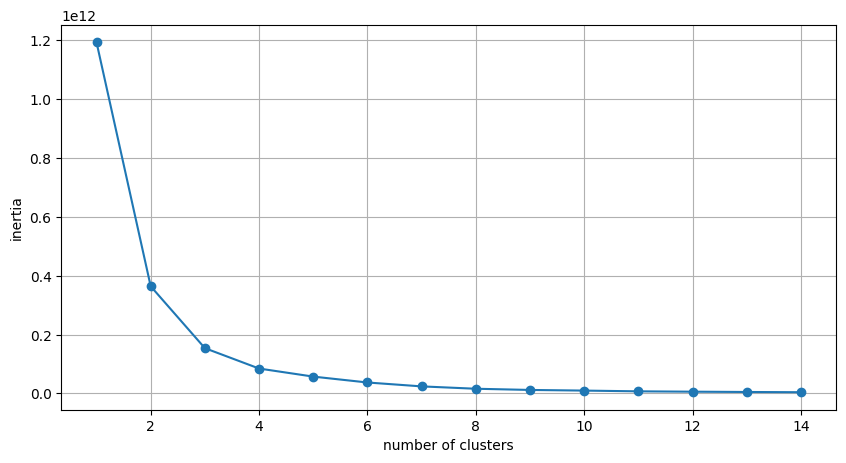

In [1067]:
elbow_method(df, 15)

In [1068]:
data_plot = data

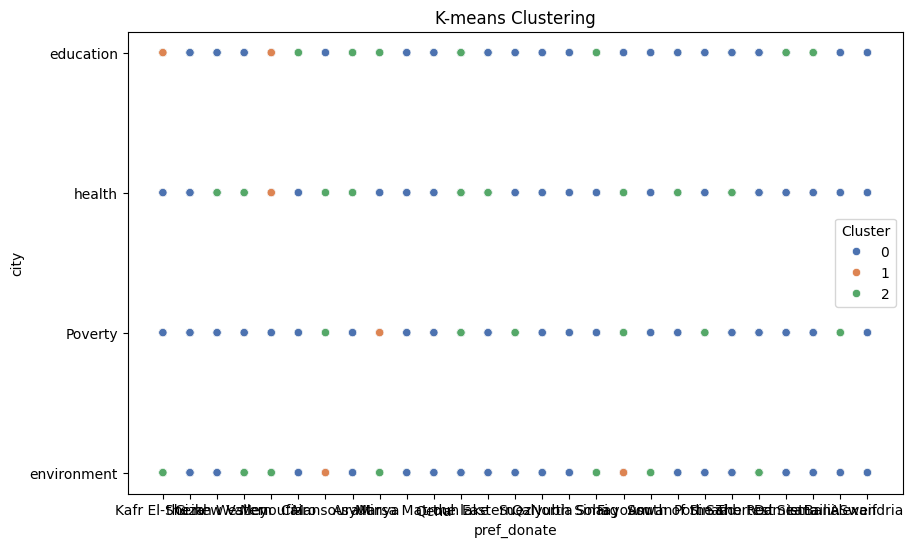

['kmeans_model.joblib']

In [1069]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10,  max_iter=300, random_state=42)
kmeans.fit(df)

data_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_plot, x=data_plot['city'], y=data_plot['pref_donate'], hue='Cluster', palette='deep', legend='full')
plt.title('K-means Clustering')
plt.xlabel('pref_donate')
plt.ylabel('city')
plt.show()

from joblib import dump

# Save the model to disk
dump(kmeans, 'kmeans_model.joblib')

In [1070]:
from sklearn.metrics import silhouette_score
result = kmeans.labels_
print(silhouette_score(df, result))

0.6641113277942934


In [1071]:
from sklearn.metrics import calinski_harabasz_score
result = kmeans.labels_
print(calinski_harabasz_score(df, result))

33778.76759231065


In [1072]:
from sklearn.metrics import davies_bouldin_score
result = kmeans.labels_
print(davies_bouldin_score(df, result))

0.45088030568034504


In [1073]:
cluster_data_dict = {}

for cluster_label in set(data_plot['Cluster']):
    cluster_data = data_plot[data_plot['Cluster'] == cluster_label]
    cluster_data_dict[cluster_label] = cluster_data

for cluster_label, cluster_data in cluster_data_dict.items():
    print(f'Cluster {cluster_label} Data:')
    print(cluster_data)

Cluster 0 Data:
      age sex            city  pref_donate donate_type donate_way  \
0      15   f  Kafr El-Sheikh    education      things     online   
1      54   m            Giza       health        time    himself   
2      31   f  the new Valley      Poverty      skills     mobile   
3      17   f         Western  environment   knowledge      email   
4      34   f        Menoufia       health      things     mobile   
...   ...  ..             ...          ...         ...        ...   
9994   60   f    the shortest    education        time     online   
9995   17   m        Ismailia       health   knowledge    himself   
9996   47   f           Aswan      Poverty      things     mobile   
9997   47   f     North Sinai      Poverty      skills      email   
9998   18   f        Damietta  environment   knowledge     mobile   

      donate_number  income  Cluster  
0                 1    3000        0  
1                 3    5000        0  
2                 2    4000        0  

In [1074]:
cluster_one = cluster_data_dict[0]
cluster_two = cluster_data_dict[1]
cluster_three = cluster_data_dict[2]

In [1075]:
def statistic_method(clus_name):
  word_count = clus_name.value_counts()
  print(word_count)

In [1076]:
statistic_method(cluster_one['pref_donate'])
print('\n')

statistic_method(cluster_one['donate_type'])

pref_donate
health         2489
education      1640
Poverty        1201
environment    1102
Name: count, dtype: int64


donate_type
things       1944
knowledge    1843
skills       1638
time         1007
Name: count, dtype: int64


In [1077]:
statistic_method(cluster_two['pref_donate'])
print('\n')
statistic_method(cluster_two['donate_type'])


pref_donate
health         277
education      190
Poverty        131
environment    128
Name: count, dtype: int64


donate_type
things       217
knowledge    214
skills       197
time          98
Name: count, dtype: int64


In [1078]:
statistic_method(cluster_three['pref_donate'])
print('\n')
statistic_method(cluster_three['donate_type'])


pref_donate
health         1091
education       728
Poverty         529
environment     493
Name: count, dtype: int64


donate_type
things       825
knowledge    811
skills       723
time         482
Name: count, dtype: int64


In [1079]:
user_data =[[20, 'm', 'Qena', 'sports', 'environment', 'things', 'email', 12, 16000]]
new_df = pd.DataFrame(user_data)
new_df.head()

,0,1,2,3,4,5,6,7,8
0,20,m,Qena,sports,environment,things,email,12,16000


In [1080]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
new_df.columns = cols_name
new_df

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,20,m,Qena,sports,environment,things,email,12,16000


In [1081]:
new_df.drop(['pref_hobby'] ,axis = 1 , inplace = True)
new_df

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,20,m,Qena,environment,things,email,12,16000


In [1082]:
new_df['sex'] = encode_columns(encoded_data_sex, new_df['sex'])

In [1083]:
new_df['city'] = encode_columns(encoded_data_city, new_df['city'])

In [1084]:
new_df['pref_donate']= encode_columns(encoded_data_pref_donate, new_df['pref_donate'])

In [1085]:
new_df['donate_type'] = encode_columns(encoded_data_donate_type, new_df['donate_type'])

In [1086]:
new_df['donate_way'] = encode_columns(encoded_data_donate_way, new_df['donate_way'])

In [1087]:
new_df

,age,sex,city,pref_donate,donate_type,donate_way,donate_number,income
0,20,0,27,4,1,4,12,16000


In [1088]:
new_df.drop(['age', 'sex'], axis = 1, inplace =True)
new_df

,city,pref_donate,donate_type,donate_way,donate_number,income
0,27,4,1,4,12,16000


In [1089]:
from joblib import load

# Load the model from disk
loaded_model = load('kmeans_model.joblib')

In [1090]:
predection = loaded_model.predict(new_df)
predection

array([2], dtype=int32)